# 0.Import libraries

In [1]:
import numpy as np
import pandas as pd

# 1. 데이터 적재
## sepal, petal

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [8]:
print "iris_dataset의 크기:\n", iris_dataset.keys()

iris_dataset의 크기:
['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']


In [9]:
print iris_dataset['DESCR'][:193] + "\n..."

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [11]:
print "name of target:", iris_dataset['target_names']
print "name of feature:", iris_dataset['feature_names']
print "type of data:", type(iris_dataset['data'])
print "size of data:", iris_dataset['data'].shape
print "first five rows of data:", iris_dataset['data'][:5]
print "type of target:",type(iris_dataset['target'])
print "size of target", iris_dataset['target'].shape
print "target:", iris_dataset['target']

 name of target: ['setosa' 'versicolor' 'virginica']
name of feature: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
type of data: <type 'numpy.ndarray'>
size of data: (150, 4)
first five rows of data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
type of target: <type 'numpy.ndarray'>
size of target (150,)
target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. 성능측정 :train data & test data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                   iris_dataset['target'],
                                                   random_state=0)

In [14]:
print "size of x_train:", x_train.shape
print "size of y_train:", y_train.shape
print "size of x_test:", x_test.shape
print "size of y_test:", y_test.shape

size of x_train: (112, 4)
size of y_train: (112,)
size of x_test: (38, 4)
size of y_test: (38,)


# 3.데이터 살펴보기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56c5755790>,
      dtype=object)

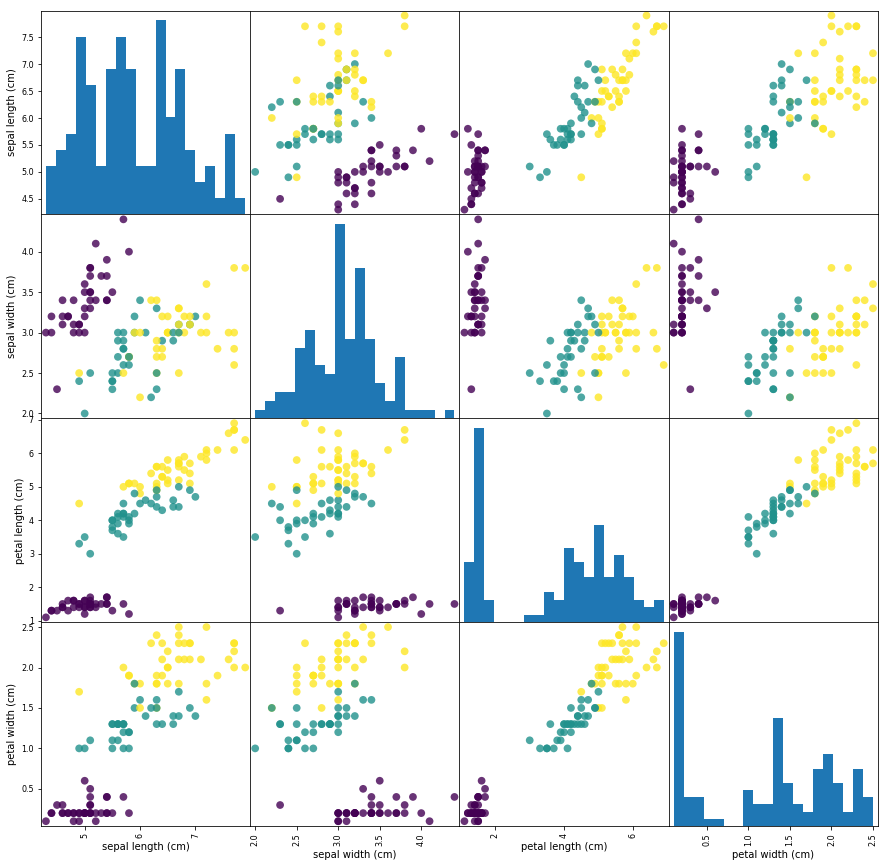

In [18]:
iris_dataframe = pd.DataFrame(x_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=.8)

# 4. k-NN 알고리즘

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# 5. Prediction

In [22]:
x_new = np.array([[5, 2.9, 1, 0.2]])
print "x_new.shape:", x_new.shape

x_new.shape: (1, 4)


In [26]:
prediction = knn.predict(x_new)
print "prediction:", prediction
print "predicted target name:",iris_dataset['target_names'][prediction]

prediction: [0]
predicted target name: ['setosa']


# 6. 퍼포먼스 측정

In [27]:
y_pred = knn.predict(x_test)
print "predicted test dataset:\n", y_pred

predicted test dataset:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [29]:
print "accuracy for test set: {:.2f}".format(np.mean(y_pred==y_test))

accuracy for test set: 0.97
